In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# retrieve the data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Convert data into numpy array
data = np.array(data)

# Get the shape of the data array
m, n = data.shape

# Shuffle the data array before splitting into development and training sets
np.random.shuffle(data)

# Split the first 1000 rows of the shuffled data array as the development set
data_dev = data[0:1000].T
Y_dev = data_dev[0] # Set the target variable for the development set
X_dev = data_dev[1:n] # Set the features for the development set
X_dev = X_dev / 255. # Normalize the features by dividing by 255 to ensure values are between 0 and 1

# Split the remaining rows of the shuffled data array as the training set
data_train = data[1000:m].T
Y_train = data_train[0] # Set the target variable for the training set
X_train = data_train[1:n] # Set the features for the training set
X_train = X_train / 255. # Normalize the features by dividing by 255 to ensure values are between 0 and 1

# Get the shape of the training set features
_, m_train = X_train.shape


In [4]:
# Initialize the weights and biases for the neural network
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    w3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2, w3, b3

# Define the ReLU activation function
def ReLU(z):
    return np.maximum(z, 0)

# Define the derivative of the ReLU activation function
def derivative_ReLU(z):
    return z > 0

# Define the softmax activation function
def softmax(z):
    softmax_val = np.exp(z) / sum(np.exp(z))
    return softmax_val

# Forward propagation through the neural network
def forward_prop(w1, b1, w2, b2, w3, b3, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = ReLU(z2)
    z3 = w3.dot(a2) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

# One-hot encoding of target variables
def one_hot_encoding(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

# Backward propagation through the neural network to calculate gradients
def backward_prop(z1, a1, z2, a2, z3, a3, w1, w2, w3, x, y):
    one_hot_y = one_hot_encoding(y)
    dz3 = a3 - one_hot_y
    dw3 = 1 / m * dz3.dot(a2.T)
    db3 = 1 / m * np.sum(dz3)
    dz2 = w3.T.dot(dz3) * derivative_ReLU(z2)
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * derivative_ReLU(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2, dw3, db3

# Update the weights and biases using the calculated gradients
def update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2    
    w3 = w3 - alpha * dw3  
    b3 = b3 - alpha * db3    
    return w1, b1, w2, b2, w3, b3

# Get the predicted output values of the neural network
def get_predictions(a3):
    return np.argmax(a3, 0)

# Get the accuracy of the neural network
def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size

# Implement gradient descent to train the neural network
def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2, w3, b3 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2, z3, a3 = forward_prop(w1, b1, w2, b2, w3, b3, x)
        dw1, db1, dw2, db2, dw3, db3 = backward_prop(z1, a1, z2, a2, z3, a3, w1, w2, w3, x, y)
        w1, b1, w2, b2, w3, b3 = update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a3)
            accuracy = get_accuracy(predictions, y)
            print("Accuracy: ", accuracy)
    return w1, b1, w2, b2, w3, b3


In [11]:
# Train the model on the training set

alpha = 0.10
iteration = 3000
w1, b1, w2, b2, w3, b3 = gradient_descent(X_train, Y_train, alpha, iteration)

Iteration:  0
Accuracy:  0.10034146341463415
Iteration:  50
Accuracy:  0.4385609756097561
Iteration:  100
Accuracy:  0.6255121951219512
Iteration:  150
Accuracy:  0.6774146341463415
Iteration:  200
Accuracy:  0.729780487804878
Iteration:  250
Accuracy:  0.7669756097560976
Iteration:  300
Accuracy:  0.792
Iteration:  350
Accuracy:  0.8099512195121952
Iteration:  400
Accuracy:  0.8224634146341463
Iteration:  450
Accuracy:  0.8344146341463414
Iteration:  500
Accuracy:  0.8423170731707317
Iteration:  550
Accuracy:  0.8472439024390244
Iteration:  600
Accuracy:  0.8529024390243902
Iteration:  650
Accuracy:  0.8559512195121951
Iteration:  700
Accuracy:  0.8637560975609756
Iteration:  750
Accuracy:  0.8634878048780488
Iteration:  800
Accuracy:  0.8705121951219512
Iteration:  850
Accuracy:  0.8729512195121951
Iteration:  900
Accuracy:  0.874780487804878
Iteration:  950
Accuracy:  0.8758048780487805
Iteration:  1000
Accuracy:  0.8769756097560976
Iteration:  1050
Accuracy:  0.8810243902439024
Ite

The accuracy on the training set is: 92.20%

In [12]:
def make_predictions(x, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, a3 = forward_prop(w1, b1, w2, b2, w3, b3, x)
    predictions = get_predictions(a3)
    return predictions

def test_prediction(index, w1, b1, w2, b2, w3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2, w3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [13]:
def test_output():
    n = 10 # number of indexes you want to test
    for i in range(n):
        test_prediction(i, w1, b1, w2, b2, w3, b3)

Prediction:  [0]
Label:  0


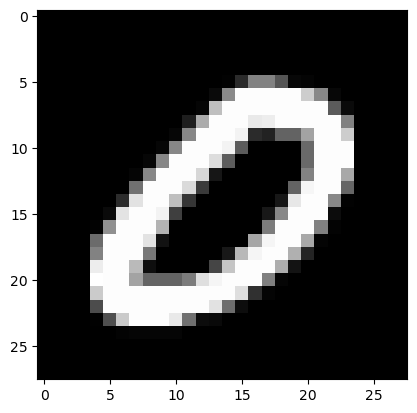

Prediction:  [9]
Label:  9


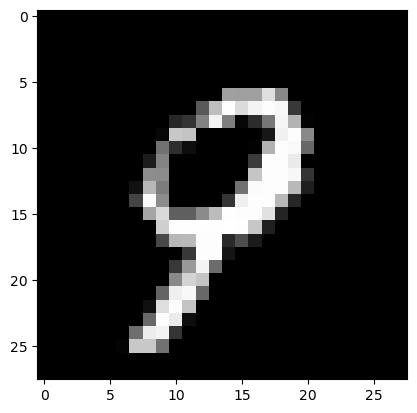

Prediction:  [6]
Label:  6


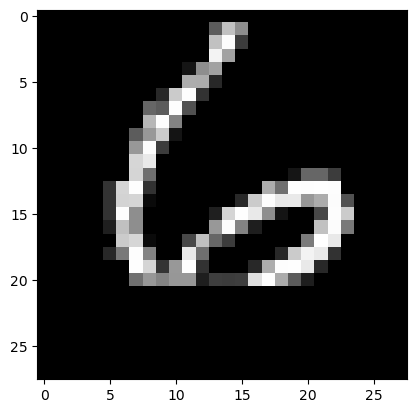

Prediction:  [8]
Label:  8


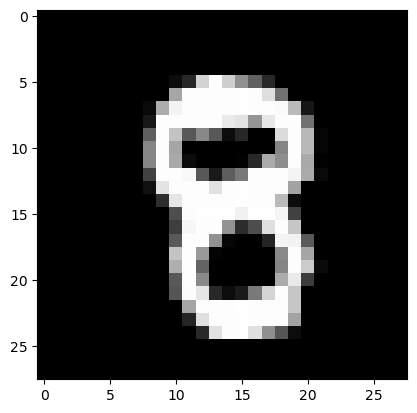

Prediction:  [5]
Label:  5


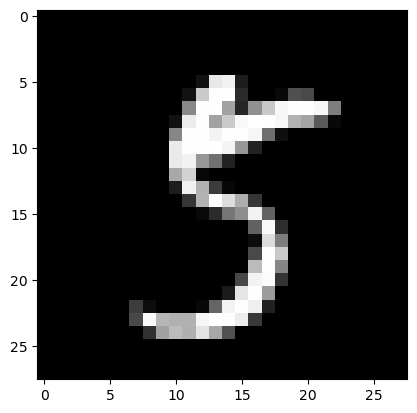

Prediction:  [9]
Label:  9


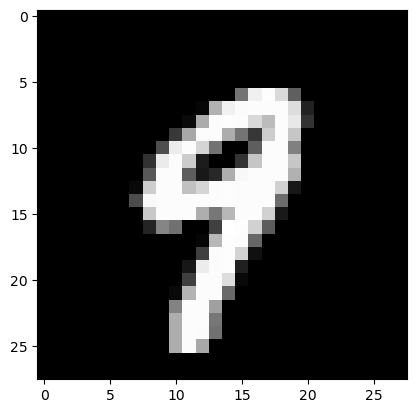

Prediction:  [0]
Label:  0


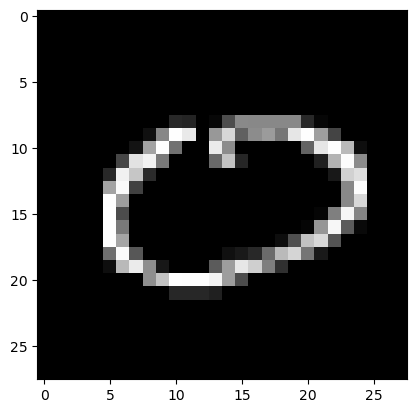

Prediction:  [7]
Label:  7


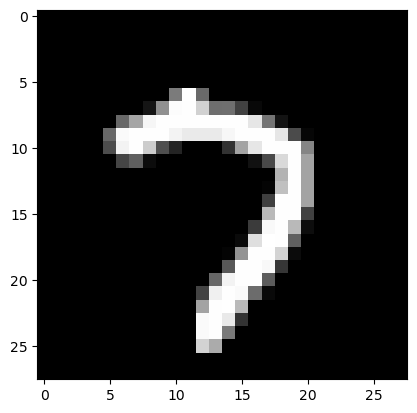

Prediction:  [6]
Label:  6


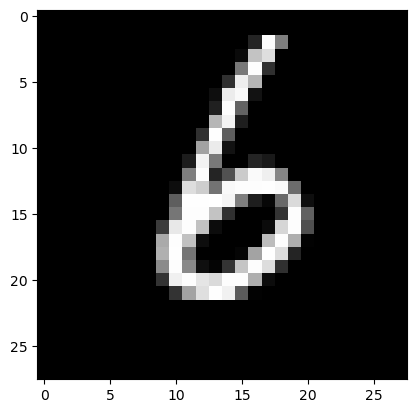

Prediction:  [4]
Label:  4


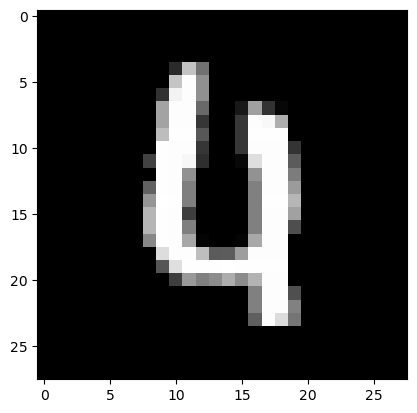

In [14]:
test_output()

In [15]:
dev_preds = make_predictions(X_dev, w1, b1, w2, b2, w3, b3)
accuracy = get_accuracy(dev_preds, Y_dev)

print("The accuracy of the model is: ", accuracy)

The accuracy of the model is:  0.916
